# Chapter 4 - Logistic Regression

## Data Generation

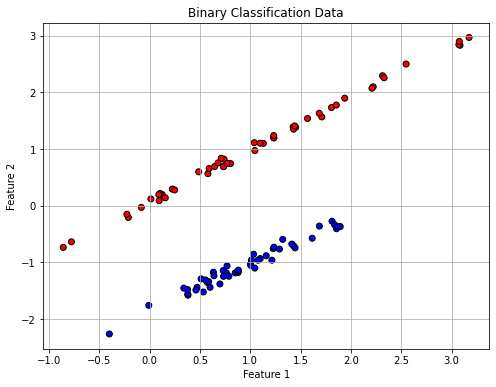

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create simple 2D binary classification data
X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2, 
                           random_state=42, n_clusters_per_class=1)

# Plot data
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Training Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

## Probability Predictions

In [3]:
# Select a few samples from the training set
X_sample = X[:5]
y_sample = y[:5]

# Show true labels
print("True labels:", y_sample)

# Show predicted probabilities for each class
probas = log_reg.predict_proba(X_sample)
print("Predicted probabilities:\n", probas)

# Show predicted class labels
preds = log_reg.predict(X_sample)
print("Predicted class labels:\n", preds)

True labels: [0 0 1 0 0]
Predicted probabilities:
 [[0.93320175 0.06679825]
 [0.97311113 0.02688887]
 [0.00618229 0.99381771]
 [0.96330587 0.03669413]
 [0.96239846 0.03760154]]
Predicted class labels:
 [0 0 1 0 0]


## Decision Boundary

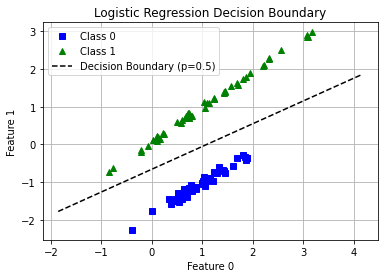

In [4]:
# Create a grid of x0 values (horizontal axis)
x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

# Compute corresponding x1 values (vertical axis) for the decision boundary
decision_boundary = -(log_reg.coef_[0][0] * x0 + log_reg.intercept_[0]) / log_reg.coef_[0][1]

# Plot dataset
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Class 0")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Class 1")

# Plot decision boundary
plt.plot(x0, decision_boundary, "k--", label="Decision Boundary (p=0.5)")

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

## Softmax Regression (Multinomial Logistic Regression) on the Iris Dataset

In this section, we use logistic regression for multi-class classification using the Iris dataset. Since logistic regression can handle multiple classes using either One-vs-All or Softmax (multinomial), we explicitly use the Softmax strategy.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [6]:
# Load the Iris dataset
iris = load_iris()
X = iris["data"]
y = iris["target"]
target_names = iris["target_names"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [7]:
# Train logistic regression using softmax (multinomial)
softmax_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
softmax_clf.fit(X_train, y_train)

# Predict
y_pred = softmax_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.2f}")


Accuracy on test set: 0.97


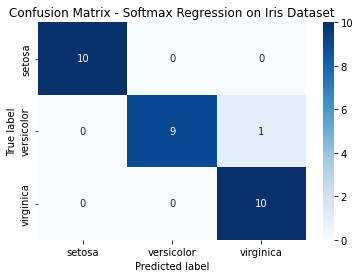

In [8]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Softmax Regression on Iris Dataset")
plt.show()


## Summary
In this notebook, we explored logistic regression for binary classification, used `predict_proba` to examine class probabilities, and visualized the decision boundary for better understanding of the model's behavior.
